Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2831 - accuracy: 0.9195 - val_loss: 0.1507 - val_accuracy: 0.9572
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1272 - accuracy: 0.9626 - val_loss: 0.1188 - val_accuracy: 0.9667
Epoch 3/5
1500/1500 [

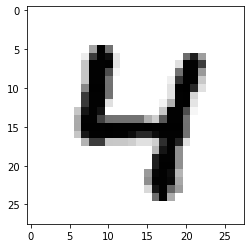

In [6]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist         # библиотека базы выборок Mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten
#загрузим наши данные
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#нормализация входных данных
x_train = x_train / 255
x_test = x_test / 255

#преобразовать числа в соответствующий выходной вектор нейронов. Например 0 - [1, 0, 0, 0 <...>]
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

model = keras.Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'), #полносвязная нейронная сеть
    Dense(10, activation='softmax')
])

print(model.summary())#вывод структуры НС в консоль

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_split=0.2)

model.evaluate(x_test, y_test_cat)

# Распознавание всей тестовой выборки
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)

#подадим какое-то изображение
n = 56
x = np.expand_dims(x_test[n], axis=0)
res = model.predict(x)
print(f"Распознанная цифра: {np.argmax(res)}") #берет максимальный индекс и выводит цифру

plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()